In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("C:\\Users\\Shaurya\\Downloads\\titanic.csv")
data.Sex=data.Sex.replace({'male':0,'female':1})
data.Embarked=data.Embarked.replace({'Q':0,'C':1,'S':2})
data=data.fillna(method='bfill')
#data.Age.replace('NaN',data.Age.mean())
#data.Embarked.replace('NaN','0')
data['Age'] = pd.cut(x=data['Age'], bins=[-np.inf,17, 60, np.inf], labels=['0', '1', '2']) 
data['Age']=np.asarray(data['Age'], dtype='int64')
data['Fare'] = pd.cut(x=data['Fare'], bins=[-np.inf,10, 30, 60, np.inf], labels=['0', '1', '2','3']) 
data['Fare']=np.asarray(data['Fare'], dtype='int64')
print(data)
X = data[['Pclass','Age','Embarked','Sex','Age','Fare']]
y = data['Survived']
for i in X.T:
    fmin = X.min()
    frange = X.max() - X.min()
    X -= fmin
    X /= frange

C:\Users\Shaurya\AppData\Local\Temp\ipykernel_1612\3527973374.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    0    1      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1    1      1   
2                               Heikkinen, Miss. Laina    1    1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1    1      1   
4                             Allen, Mr. William Henry    0    1      0   
..                                                 ...  ...  ...    ...   
886               

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
weights = np.zeros(X_train.shape[1])
lr = 0.5
num_iterations = 85
cost_history = []
print(weights)
bias=0

[0. 0. 0. 0. 0. 0.]


In [5]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

In [6]:
def predict(X_train, weights):

    z = np.dot(X_train, weights)
    return sigmoid(z)

In [7]:
def cost_function(X_train, y_train, weights):
    
    observations = len(y_train)
    predictions = predict(X_train, weights)

    class1_cost = -y_train*np.log(predictions)

    class2_cost = (1-y_train)*np.log(1-predictions)

    cost = class1_cost - class2_cost
    cost = cost.sum() / observations

    return cost
#Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.

In [8]:
def update_weights(X_train, y_train, weights, lr):
    N = len(X_train)
    predictions = predict(X_train, weights)
    gradient = np.dot(X_train.T,  predictions - y_train)
    gradient /= N
    gradient *= lr
    weights -= gradient

    return weights

In [9]:
def decision_boundary(prob):
     return 1 if prob >= .5 else 0

In [10]:
def classify(predictions):
#    decision_boundary = np.vectorize(decision_boundary)
#    return decision_boundary(predictions).flatten()
    #predictions = np.vectorize(predictions).all()
    predictions1=list(predictions)
    for i in range(len(predictions1)):
        if((predictions1[i]>=0.65).any()):
            predictions1[i]=1.0
        else: predictions1[i]=0.0
    return predictions1

In [11]:
def train(X_train, y_train, weights, lr, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        weights = update_weights(X_train, y_train, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(X_train, y_train, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print("iter: " +str(i) + " cost: "+str(cost))

    return weights, cost_history

In [12]:
weights,cost_history=train(X_train, y_train, weights, lr, num_iterations)
predictions_test = sigmoid(np.dot(X_test, weights))
predictions_test=classify(predictions_test)

c=confusion_matrix(y_test,predictions_test)
accuracy=(c[0][0]+c[1][1])/len(y_test)
print(c)
accuracy

iter: 0 cost: 0.6701125189120684
[[97  8]
 [33 41]]


0.770949720670391

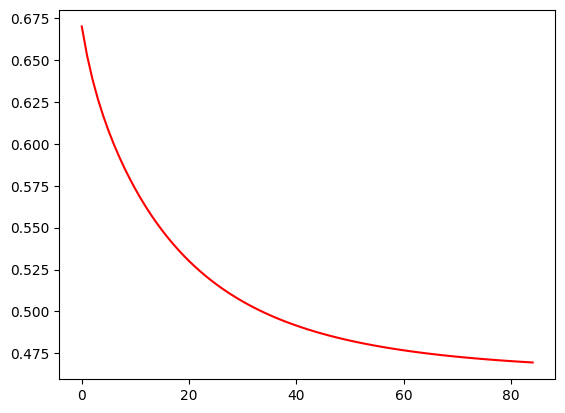

In [13]:
plt.plot(list(range(num_iterations)), cost_history, '-r')

In [15]:
Precision = c[0][0] / (c[0,0] + c[1,0])
Recall = c[0,0] / (c[0,0] + c[0,1])
F1Score = 2 * (Precision * Recall) / (Precision + Recall)
print(F1Score)

0.825531914893617
